<a href="https://colab.research.google.com/github/ETorresSacha/clases-MI/blob/main/clase1_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import io
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
# cargar el archivo
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


In [ ]:
# para borrar los datos que se sucbió
os.remove("Advertising.csv")

In [3]:
# cargamos los datos
data = pd.read_csv(io.BytesIO(uploaded['Advertising.csv']))
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# eliminar una columna
data = data.iloc[:,1:] # [filas,columnas]
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
#informacion de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
# descripcion de los datos
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
# conocer los titulos de la data
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

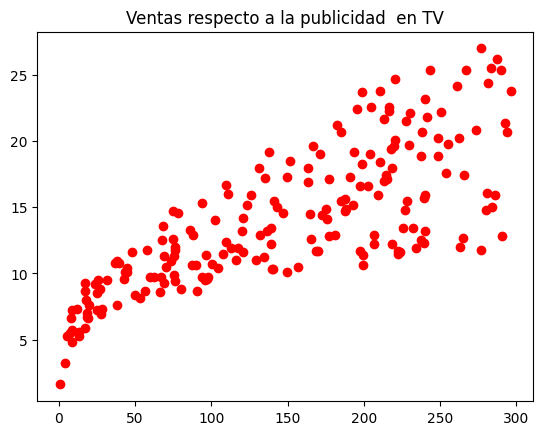

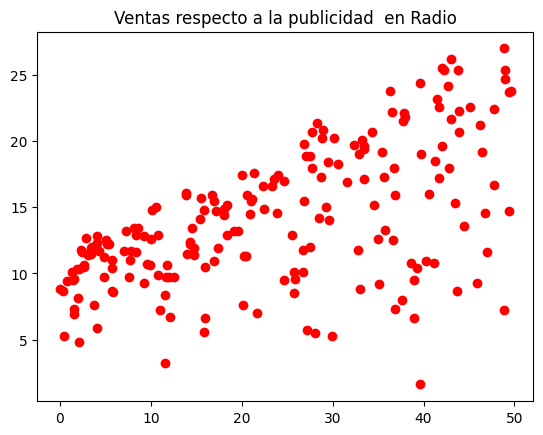

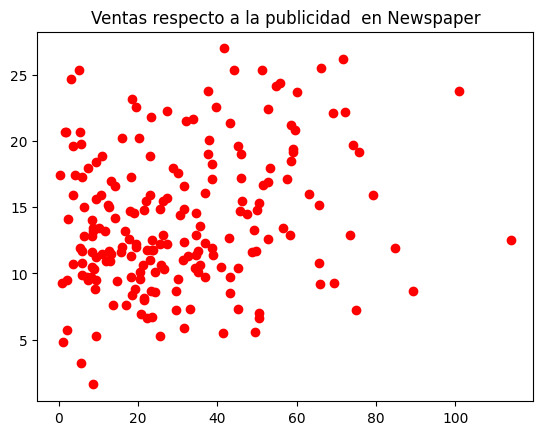

In [8]:
#relacion entre las variables
cols = ['TV', 'Radio', 'Newspaper']
for col in cols:
  plt.plot(data[col], data['Sales'],'ro')
  plt.title('Ventas respecto a la publicidad  en %s'% col)
  plt.show()


# REGRESIÓN LINEAL SIMPLE

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # ayuda para seleccionar los datos para hacer pruebas
from sklearn.metrics import mean_squared_error,r2_score

In [10]:
x = data['TV'].values.reshape(-1,1) # la funcion necesita que este en forma de matriz de una sola fila
y = data['Sales'].values

In [11]:
# Dividir el conjunto de datos entre entrenamiento y testing
X_train, X_test, y_train, Y_test = train_test_split(x,y,test_size=0.2, random_state=42)


In [12]:
lin_reg = LinearRegression() # se hace el llamado a la función
lin_reg.fit(X_train,y_train) # se le entrena

LinearRegression()

In [13]:
y_pred = lin_reg.predict(X_test) # con la función se hace la predicción de los datos, y_pred es la predicción de la regresión, valida la regresión

In [14]:
print('Predicciones:{}, Reales: {}'.format(y_pred[:4], Y_test[:4]))

Predicciones:[14.71794394 16.2115484  20.74819743  7.66403631], Reales: [16.9 22.4 21.4  7.3]


In [15]:
# calificar el modelo
# RMSE
mse = mean_squared_error(Y_test, y_pred) # devuelve el error cuadrático medio
rmse = np.sqrt(mse)
print ('rmse: ',rmse)

# R2
r2 = r2_score(Y_test,y_pred)
print('R2: ',r2)

rmse:  3.194472431998898
R2:  0.6766954295627076


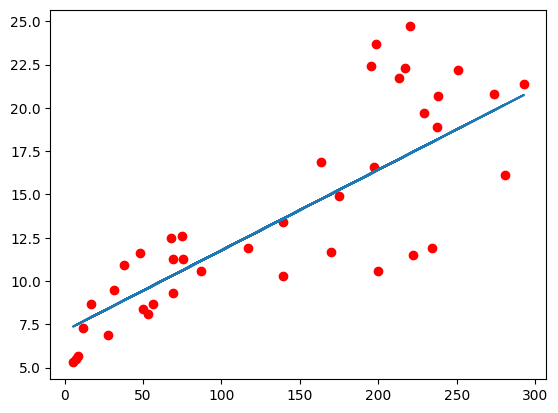

In [16]:
plt.plot(X_test,Y_test, 'ro')
plt.plot(X_test,y_pred)
plt.show()

In [70]:
def funcioCPredic (indendiente):
  x = data[indendiente].values.reshape(-1,1) # la funcion necesita que este en forma de matriz de una sola fila
  y = data['Sales'].values

  # Dividir el conjunto de datos entre entrenamiento y testing
  X_train, X_test, Y_tain, Y_test = train_test_split(x,y,test_size=0.2, random_state=42)

   # Crea la regresión lineal
  lin_reg = LinearRegression() # se hace el llamado a la función
  lin_reg.fit(X_train,Y_tain) # se le entrena

  # Compara
  y_pred = lin_reg.predict(X_test) #  y_pred es la predicción de la regresión, valida la regresión
  print('Predicciones:{}, Reales: {}'.format(y_pred[:4], Y_test[:4]))

  # calificar el modelo
  # RMSE
  mse = mean_squared_error(Y_test, y_pred) # devuelve el error cuadrático medio
  rmse = np.sqrt(mse)
  print ('rmse: ',rmse)

  # R2
  r2 = r2_score(Y_test,y_pred)
  print('R2: ',r2)

  #Grafica
  # nota: graficar de esta manera, es para hacerlo personalizado
  plt.plot(X_test,Y_test, 'ro') # grafico los datos reales
  plt.plot(X_test,y_pred) # grfico las regresion lineal (sale linea recta)
  plt.show()

  # NOTA:
  # compara que tan lejos estan los datos reales de la linea de regresion(este es calculado)
  # la dispersion de los datos reales respecto a la linea de regresion(manual)

    # seaborn
  print('GRÁFICO LOS PUNTOS CON PLOT Y SEABORN')
  plt.plot(Y_test,y_pred, 'go') # plot:solo grafica los puntos
  plt.show()
  sns.regplot(x=Y_test,y=y_pred) # seaborn: grafica los puntos y te da la linea de regresion

  # NOTA:

  # x=Y_test,y=y_pred: compara los datos reales con los datos calculados con la regresion(este es auotmatico, del mismo programa)
   # verifico si mis datos predecidos 'y_pred' son similares a mis datos reales 'Y_test', si la dispersion es demasido indica que no es una buena regresion

  # SI x=Y_test,y=y_pred, LOS PUNTOS FORMADOS SON LINEAL INDICA QUE LA REGRECION EN PERFECTA, EN ESA PROPORCION
  # si tines duda, mira que representa el x y la y, la linea azul es la regresion linela o la fórmula que se prepresenta
  # mientras que los puentos azules son los puntos cardinales de cada valor de x con y, asi mismo se puede ver con plot cuando se grafica esos valores
  # Mostrar fórmula
  print("Intercepto (b0):", lin_reg.intercept_)
  print("Coeficiente (b1):", lin_reg.coef_[0])
  print(f"Fórmula: lin_reg = {lin_reg.intercept_:.2f} + {lin_reg.coef_[0]:.2f} * x")

Predicciones:[15.88332197 19.17427219 15.20877938 16.96667826], Reales: [16.9 22.4 21.4  7.3]
rmse:  4.8216974799471926
R2:  0.2634309396999791


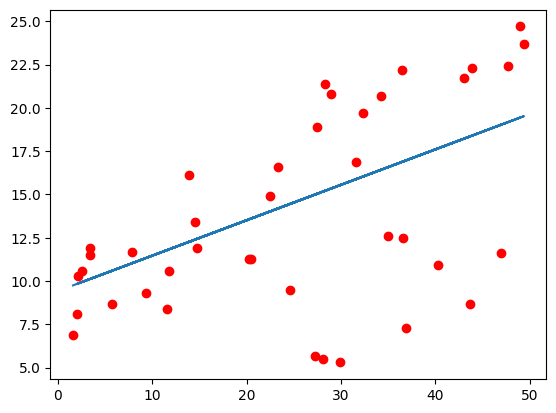

GRÁFICO LOS PUNTOS CON PLOT Y SEABORN


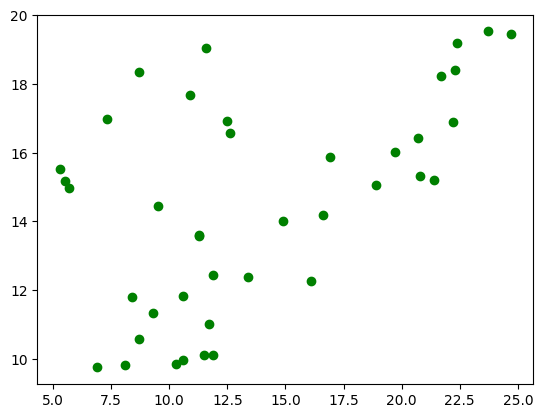

Intercepto (b0): 9.424065649663843
Coeficiente (b1): 0.2044068457292929
Fórmula: lin_reg = 9.42 + 0.20 * x


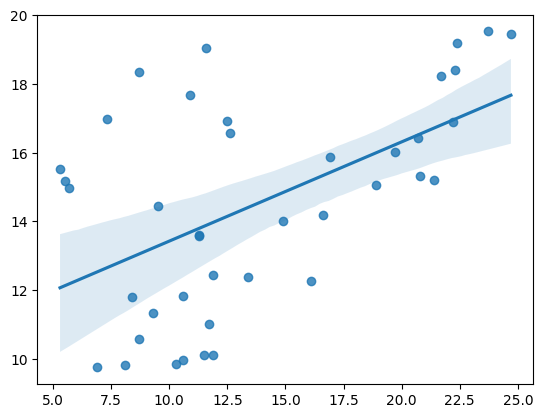

In [71]:
funcioCPredic('Radio')

# REGRESIÓN LINEAL MÚLTIPLE


In [20]:
import seaborn as sns

Predicciones:[16.35747252 20.86299397 21.52505848 10.58719845], Reales: [16.9 22.4 21.4  7.3]
rmse:  1.7714254173033515
R2:  0.9005833101920356


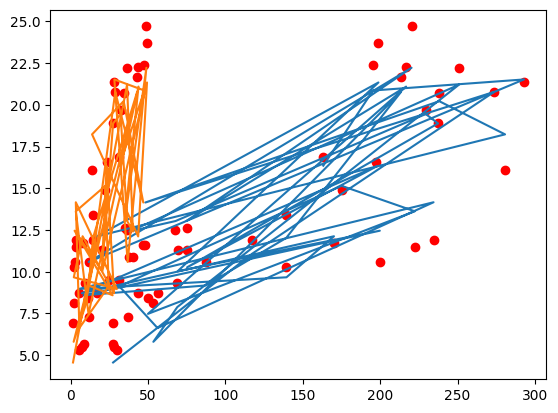

<Axes: >

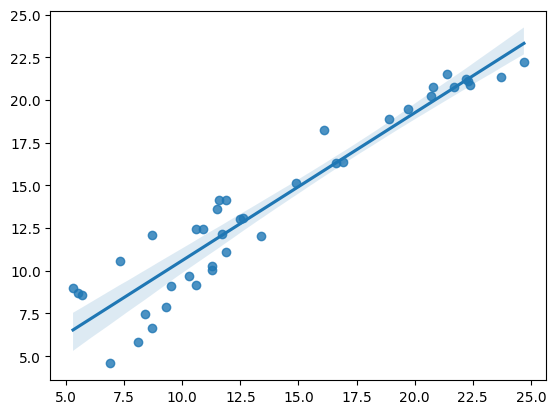

In [22]:
# 'TV', 'Radio', 'Newspaper', 'Sales'
x = data.drop(['Newspaper', 'Sales'],axis=1).values # no se usa reshape, porque con esto ya nos da una matrizz
y = data['Sales'].values
# Dividir el conjunto de datos entre entrenamiento y testing
X_train, X_test, Y_tain, Y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# Crea la regresión lineal
lin_reg = LinearRegression() # se hace el llamado a la función
lin_reg.fit(X_train,Y_tain) # se le entrena

# Compara
y_pred = lin_reg.predict(X_test) #  y_pred es la predicción de la regresión, valida la regresión
print('Predicciones:{}, Reales: {}'.format(y_pred[:4], Y_test[:4]))

# calificar el modelo
# RMSE
mse = mean_squared_error(Y_test, y_pred) # devuelve el error cuadrático medio
rmse = np.sqrt(mse)
print ('rmse: ',rmse)

# R2
r2 = r2_score(Y_test,y_pred)
print('R2: ',r2)

#Grafica
  # plot
plt.plot(X_test,Y_test, 'ro')
plt.plot(X_test,y_pred)
plt.show()

  # seaborn
sns.regplot(x=Y_test,y=y_pred)



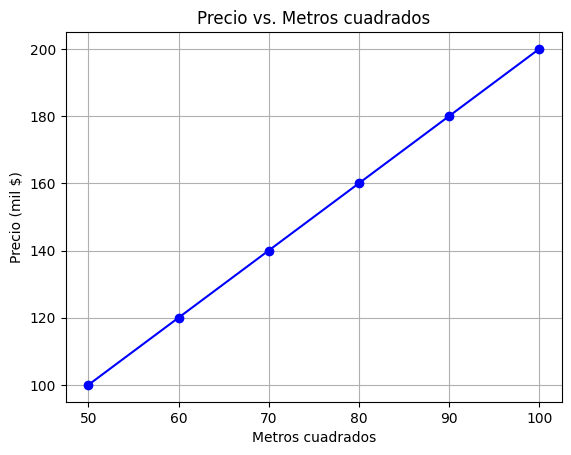

<Axes: xlabel='metros', ylabel='precio'>

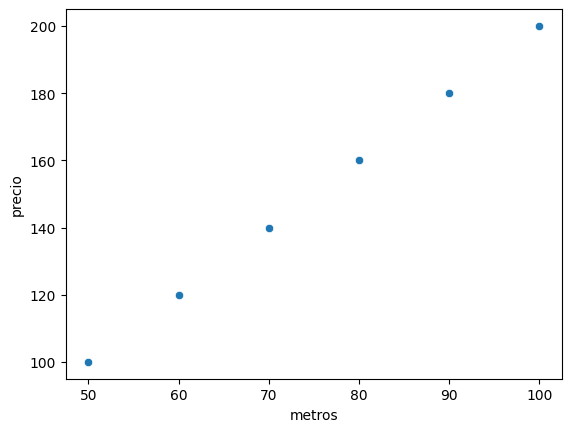

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({
    'metros': [50, 60, 70, 80, 90, 100],
    'precio': [100, 120, 140, 160, 180, 200]
})



plt.plot(df['metros'], df['precio'], marker='o', color='blue')
plt.title('Precio vs. Metros cuadrados')
plt.xlabel('Metros cuadrados')
plt.ylabel('Precio (mil $)')
plt.grid(True)
plt.show()



sns.scatterplot(data=df, x='metros', y='precio')